In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**READING THE DATA FRAME**

Dataset column descriptions

ID: Patient identifier (int)

Age: Age of the patient (in years)

Schooling: time the patient spent in school (in years)

Gender: 1=male, 2=female

Breastfeeding: 1=yes, 2=no, 3=unknown

Varicella: 1=positive, 2=negative, 3=unknown


Initial_Symptoms: 1=visual, 2=sensory, 3=motor, 4=other, 5= visual and sensory, 6=visual and motor, 7=visual and others, 8=sensory and motor, 9=sensory and other, 10=motor and other, 11=Visual, sensory and motor, 12=visual, sensory and other, 13=Visual, motor and other, 14=Sensory, motor and other, 15=visual,
sensory,motor and other


Mono _or_Polysymptomatic: 1=monosymptomatic, 2=polysymptomatic, 3=unknown

Oligoclonal_Bands: 0=negative, 1=positive, 2=unknown

LLSSEP: 0=negative, 1=positive

ULSSEP:0=negative, 1=positive

VEP:0=negative, 1=positive

BAEP: 0=negative, 1=positive


Periventricular_MRI:0=negative, 1=positive

Cortical_MRI: 0=negative, 1=positive

Infratentorial_MRI:0=negative, 1=positive

Spinal_Cord_MRI: 0=negative, 1=positive

https://mstrust.org.uk/a-z/expanded-disability-status-scale-edss

initial_EDSS:0 to 10

final_EDSS:0 to 10

Group: 1=CDMS, 2=non-CDMS

**Definition of some of the technical/medical terms.**

Varicella : Another name for Chickenpox, or chicken pox, is a highly contagious disease caused by the initial infection with varicella zoster virus (VZV), a member of the herpesvirus family.

BAEP: In human neuroanatomy, brainstem auditory evoked potentials (BAEPs), also called brainstem auditory evoked responses (BAERs), are very small auditory evoked potentials in response to an auditory stimulus, which are recorded by electrodes placed on the scalp.

VEP: Visual evoked potential (VEP) is an evoked potential elicited by presenting light flash or pattern stimulus which can be used to confirm damage to visual pathway including retina, optic nerve, optic chiasm, optic radiations, and occipital cortex.

Oligoclonal bands: Oligoclonal bands (OCBs) are bands of immunoglobulins that are seen when a patient's blood serum, or cerebrospinal fluid (CSF) is analyzed. They are used in the diagnosis of various neurological and blood diseases. Oligoclonal bands are present in the CSF of more than 95% of patients with clinically definite multiple sclerosis.

SSEP : Somatosensory evoked potentials (SSEP) are recorded from the central nervous system following stimulation of peripheral nerves. ULSSEP (upper limb SSEP), LLSSEP (lower limb SSEP)

EDSS: The Expanded Disability Status Scale (EDSS) is a method of quantifying disability in multiple sclerosis and monitoring changes in the level of disability over time. It is widely used in clinical trials and in the assessment of people with MS. 2

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Mestrado/Mestrado_CIn_2023/Topicos em IC 2/Data/sclerosis.csv',index_col='Unnamed: 0')
print(df.shape)
print(df.columns)
df['group'] = df['group'].replace(2,0)
df.head()

(273, 19)
Index(['Gender', 'Age', 'Schooling', 'Breastfeeding', 'Varicella',
       'Initial_Symptom', 'Mono_or_Polysymptomatic', 'Oligoclonal_Bands',
       'LLSSEP', 'ULSSEP', 'VEP', 'BAEP', 'Periventricular_MRI',
       'Cortical_MRI', 'Infratentorial_MRI', 'Spinal_Cord_MRI', 'Initial_EDSS',
       'Final_EDSS', 'group'],
      dtype='object')


,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


É importante observar que substitui o grupo 2 para 0 (grupo de negativos para CDMS) para facilitar a compreensão

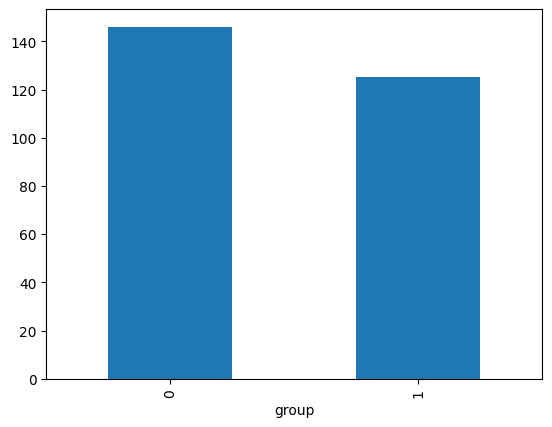

In [62]:
df['group'].value_counts().plot(kind='bar')
plt.show()

In [29]:
# Counting NaN values per column
df.isnull().sum()

Gender                       0
Age                          0
Schooling                    1
Breastfeeding                0
Varicella                    0
Initial_Symptom              1
Mono_or_Polysymptomatic      0
Oligoclonal_Bands            0
LLSSEP                       0
ULSSEP                       0
VEP                          0
BAEP                         0
Periventricular_MRI          0
Cortical_MRI                 0
Infratentorial_MRI           0
Spinal_Cord_MRI              0
Initial_EDSS               148
Final_EDSS                 148
group                        0
dtype: int64

Como pode ser visto acima praticamente todos os dados faltantes pertencem as colunas de EDSS que é uma métrica de dano ao tecido nervoso. Avaliarei os resultados sem essas colunas para garantir um maior numero de instâncias.

In [30]:
df = df.drop(columns=['Initial_EDSS','Final_EDSS']).dropna()

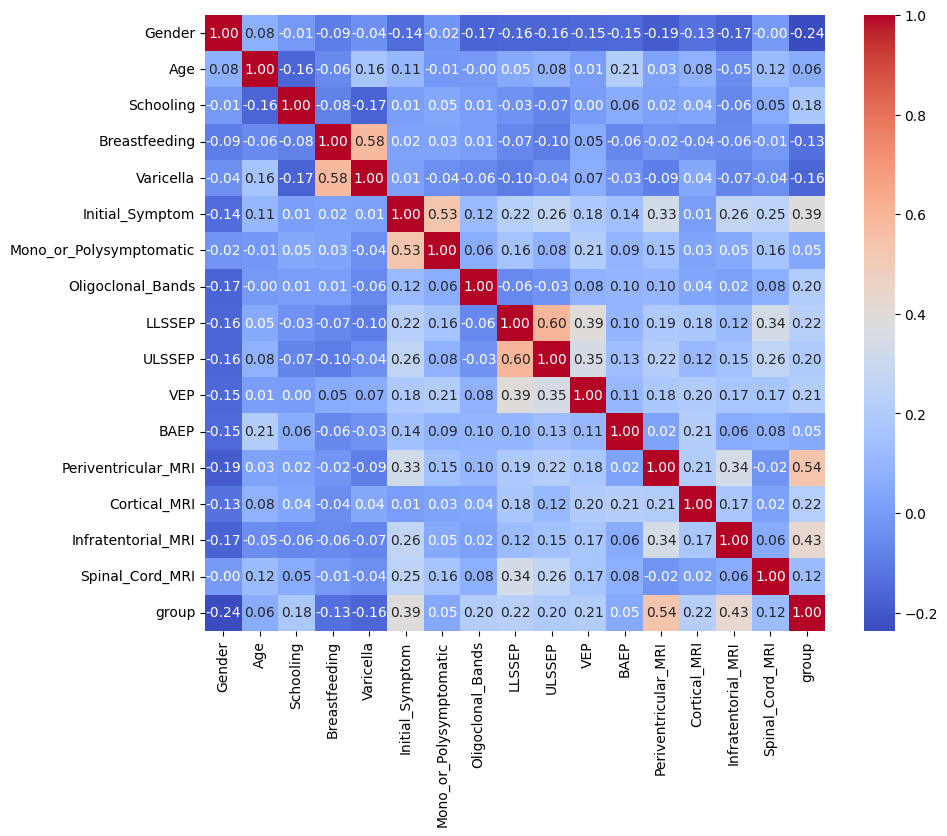

In [31]:
# Assuming df is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


**TRAINING EXAMPLES**

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['group'])
Y = df['group']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

**--- LEARNING THE RF CLASSIFIER**

In [33]:
from sklearn.inspection import PartialDependenceDisplay

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, Y_train)

**--- LEARNING THE kNN CLASSIFIER**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, Y_train)

KNeighborsClassifier()

In [67]:
from sklearn.svm import SVC

# Support Vector Machine Classifier
svm = SVC(random_state=42)
svm.fit(X_train, Y_train)

SVC(random_state=42)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_rf = rf.predict(X_test)
y_pred_knn = neigh.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Metrics calculation for SVM
metrics_svm = {
    'Accuracy': accuracy_score(Y_test, y_pred_svm),
    'Precision': precision_score(Y_test, y_pred_svm),
    'Recall': recall_score(Y_test, y_pred_svm),
    'F1 Score': f1_score(Y_test, y_pred_svm)
}
# Metrics calculation
metrics_rf = {
    'Accuracy': accuracy_score(Y_test, y_pred_rf),
    'Precision': precision_score(Y_test, y_pred_rf),
    'Recall': recall_score(Y_test, y_pred_rf),
    'F1 Score': f1_score(Y_test, y_pred_rf)
}

metrics_knn = {
    'Accuracy': accuracy_score(Y_test, y_pred_knn),
    'Precision': precision_score(Y_test, y_pred_knn),
    'Recall': recall_score(Y_test, y_pred_knn),
    'F1 Score': f1_score(Y_test, y_pred_knn)
}

def print_metrics(metrics, classifier_name):
    print(f"Metrics for {classifier_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")

print_metrics(metrics_rf, "Random Forest")
print_metrics(metrics_knn, "KNN")
print_metrics(metrics_svm, "SVM")

Metrics for Random Forest:
  Accuracy: 0.8235
  Precision: 0.7500
  Recall: 0.9000
  F1 Score: 0.8182


Metrics for KNN:
  Accuracy: 0.6765
  Precision: 0.6053
  Recall: 0.7667
  F1 Score: 0.6765


Metrics for SVM:
  Accuracy: 0.7353
  Precision: 0.6765
  Recall: 0.7667
  F1 Score: 0.7188




### **PARTIAL DEPENDENCE PLOTS**

**--- Creating the PDPs for the RF model**



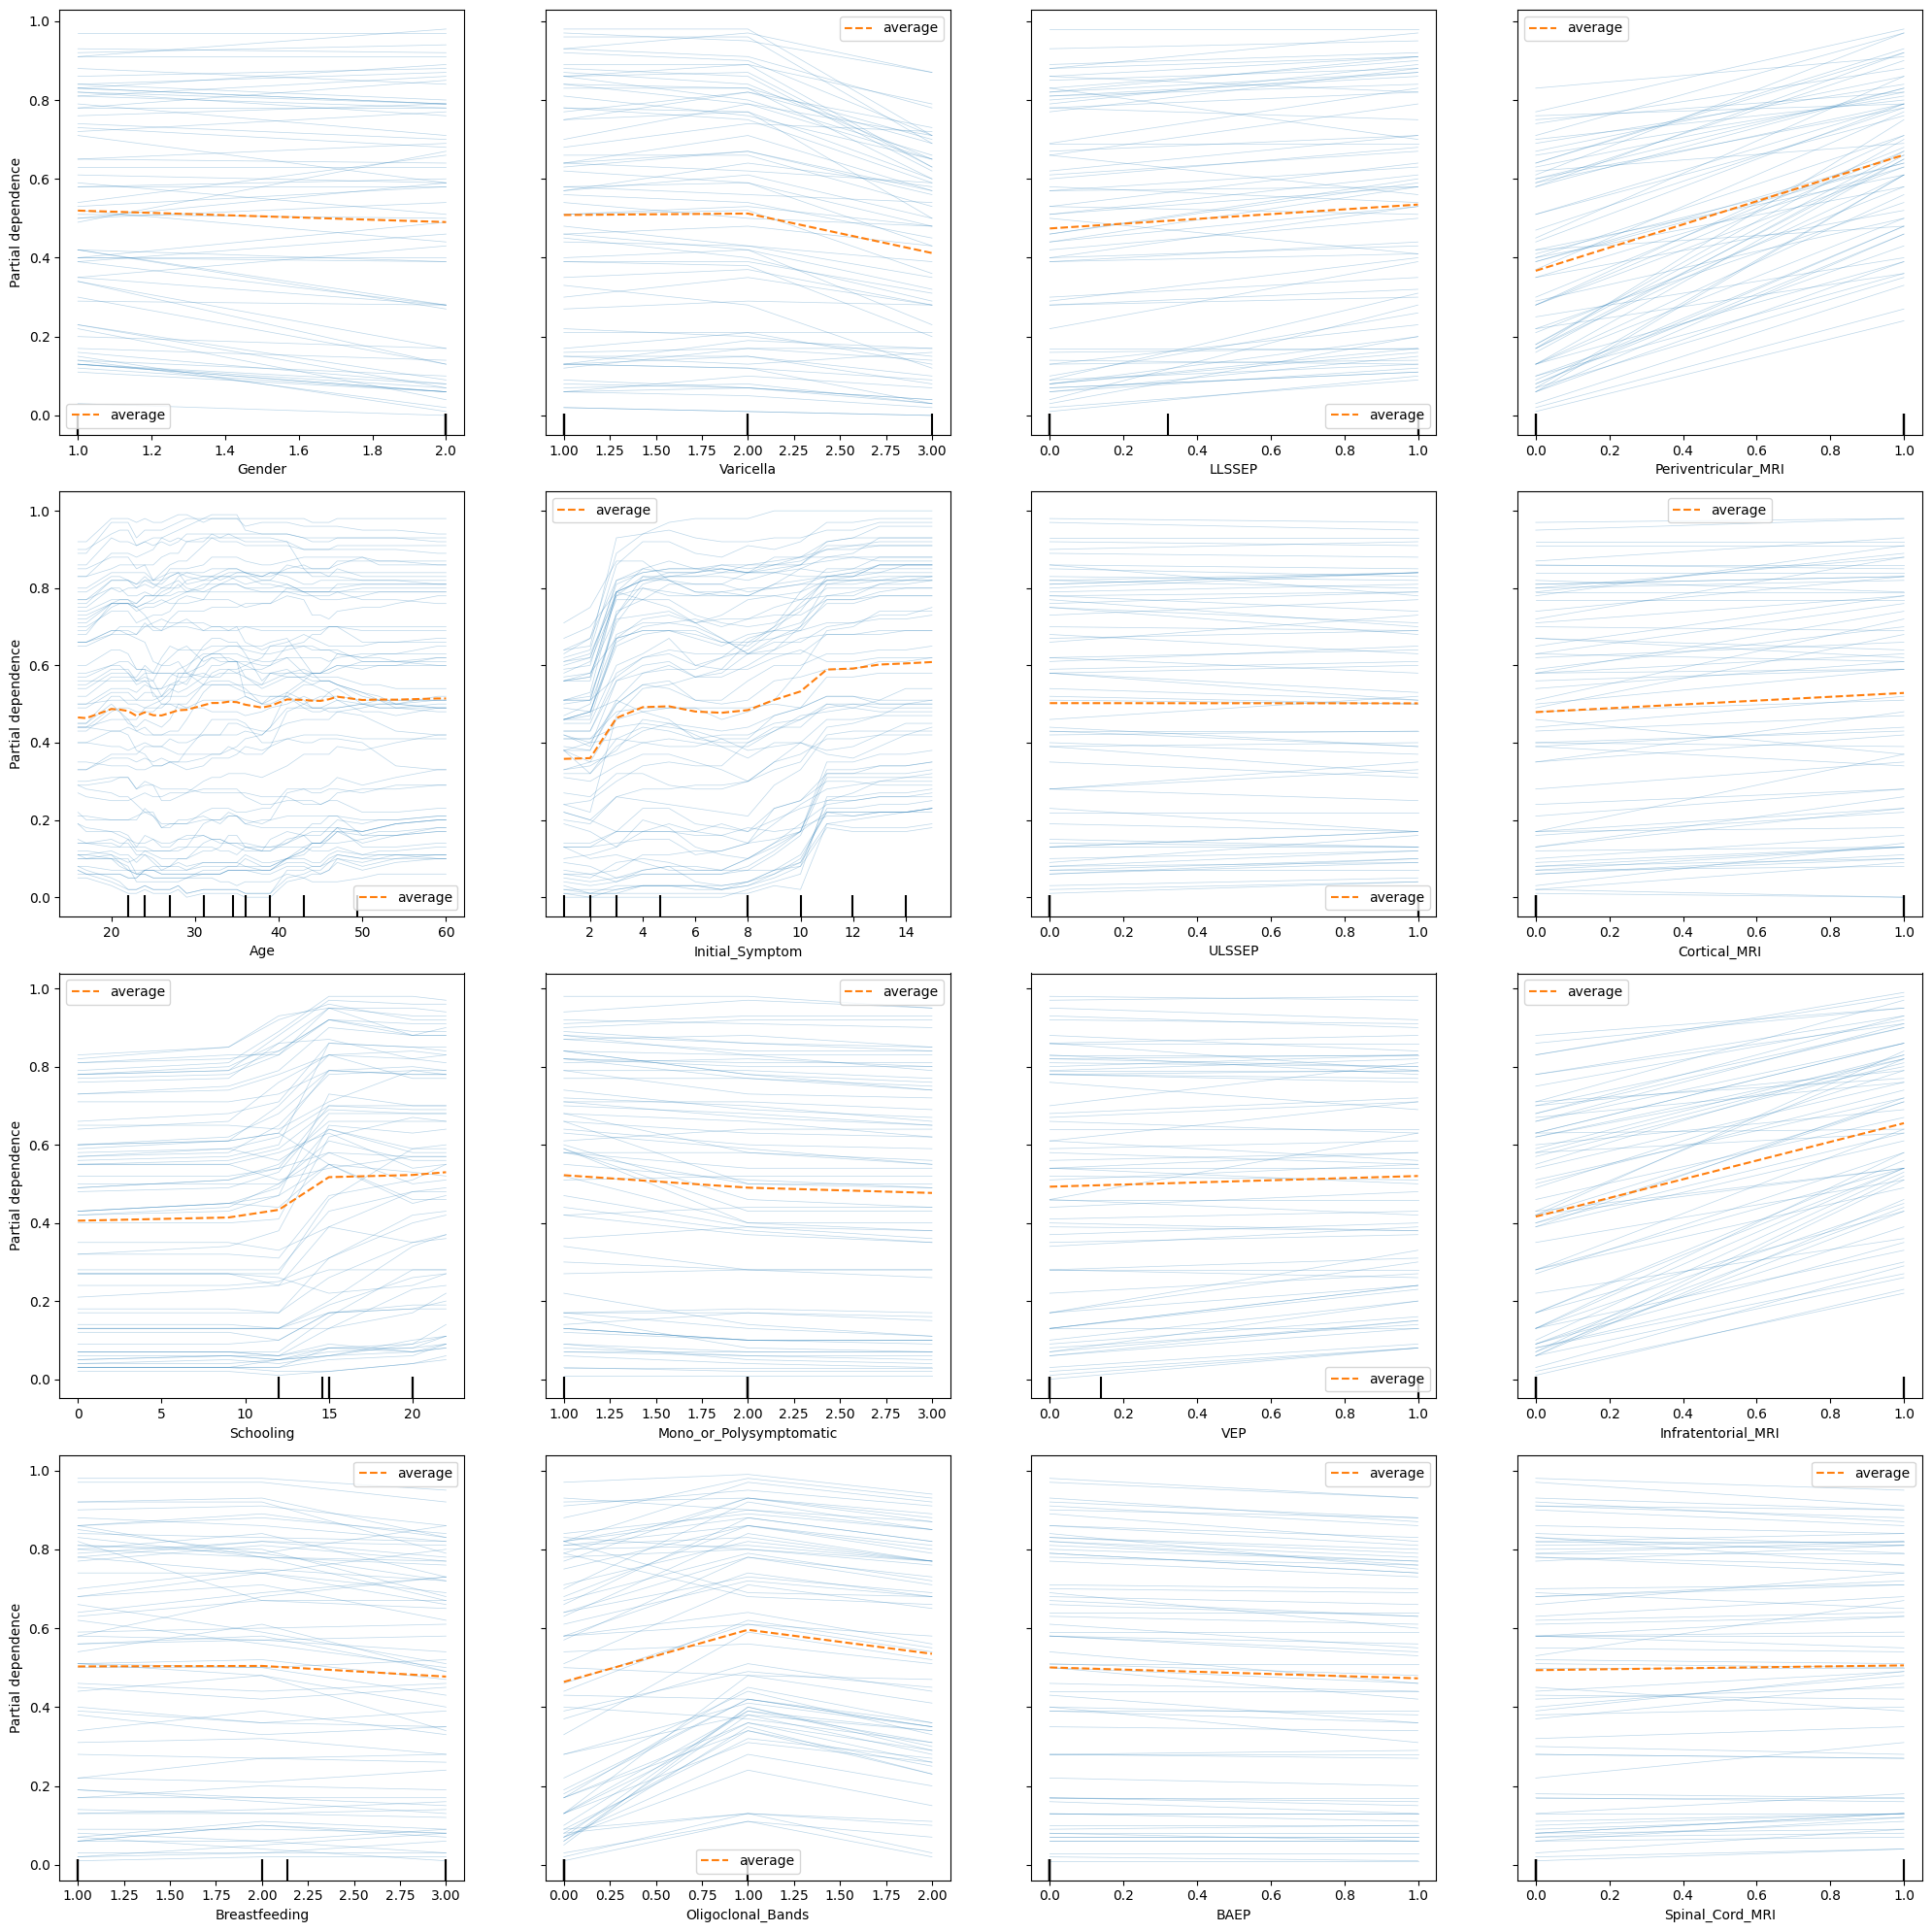

In [50]:
# Creating individual plots for each item in the loop with specified figure size, using 'ax' parameter for positioning
fig, axs = plt.subplots(4, 1, figsize=(20, 20))  # Adjust figure size and layout here

for idx, ax in enumerate(axs):
    disp2 = PartialDependenceDisplay.from_estimator(
        rf, X_test, [idx, idx+4, idx+8, idx+12], kind='both', n_cols=4, ax=ax)
plt.tight_layout()


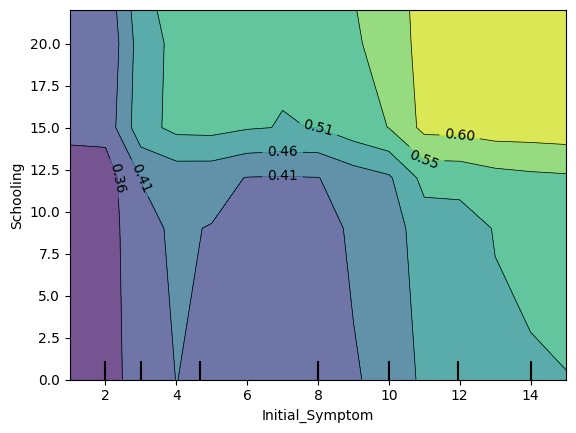

In [55]:
disp1 = PartialDependenceDisplay.from_estimator(rf, X_test, [(5,2)])

**--- Creating the PDPs for the KNN model**



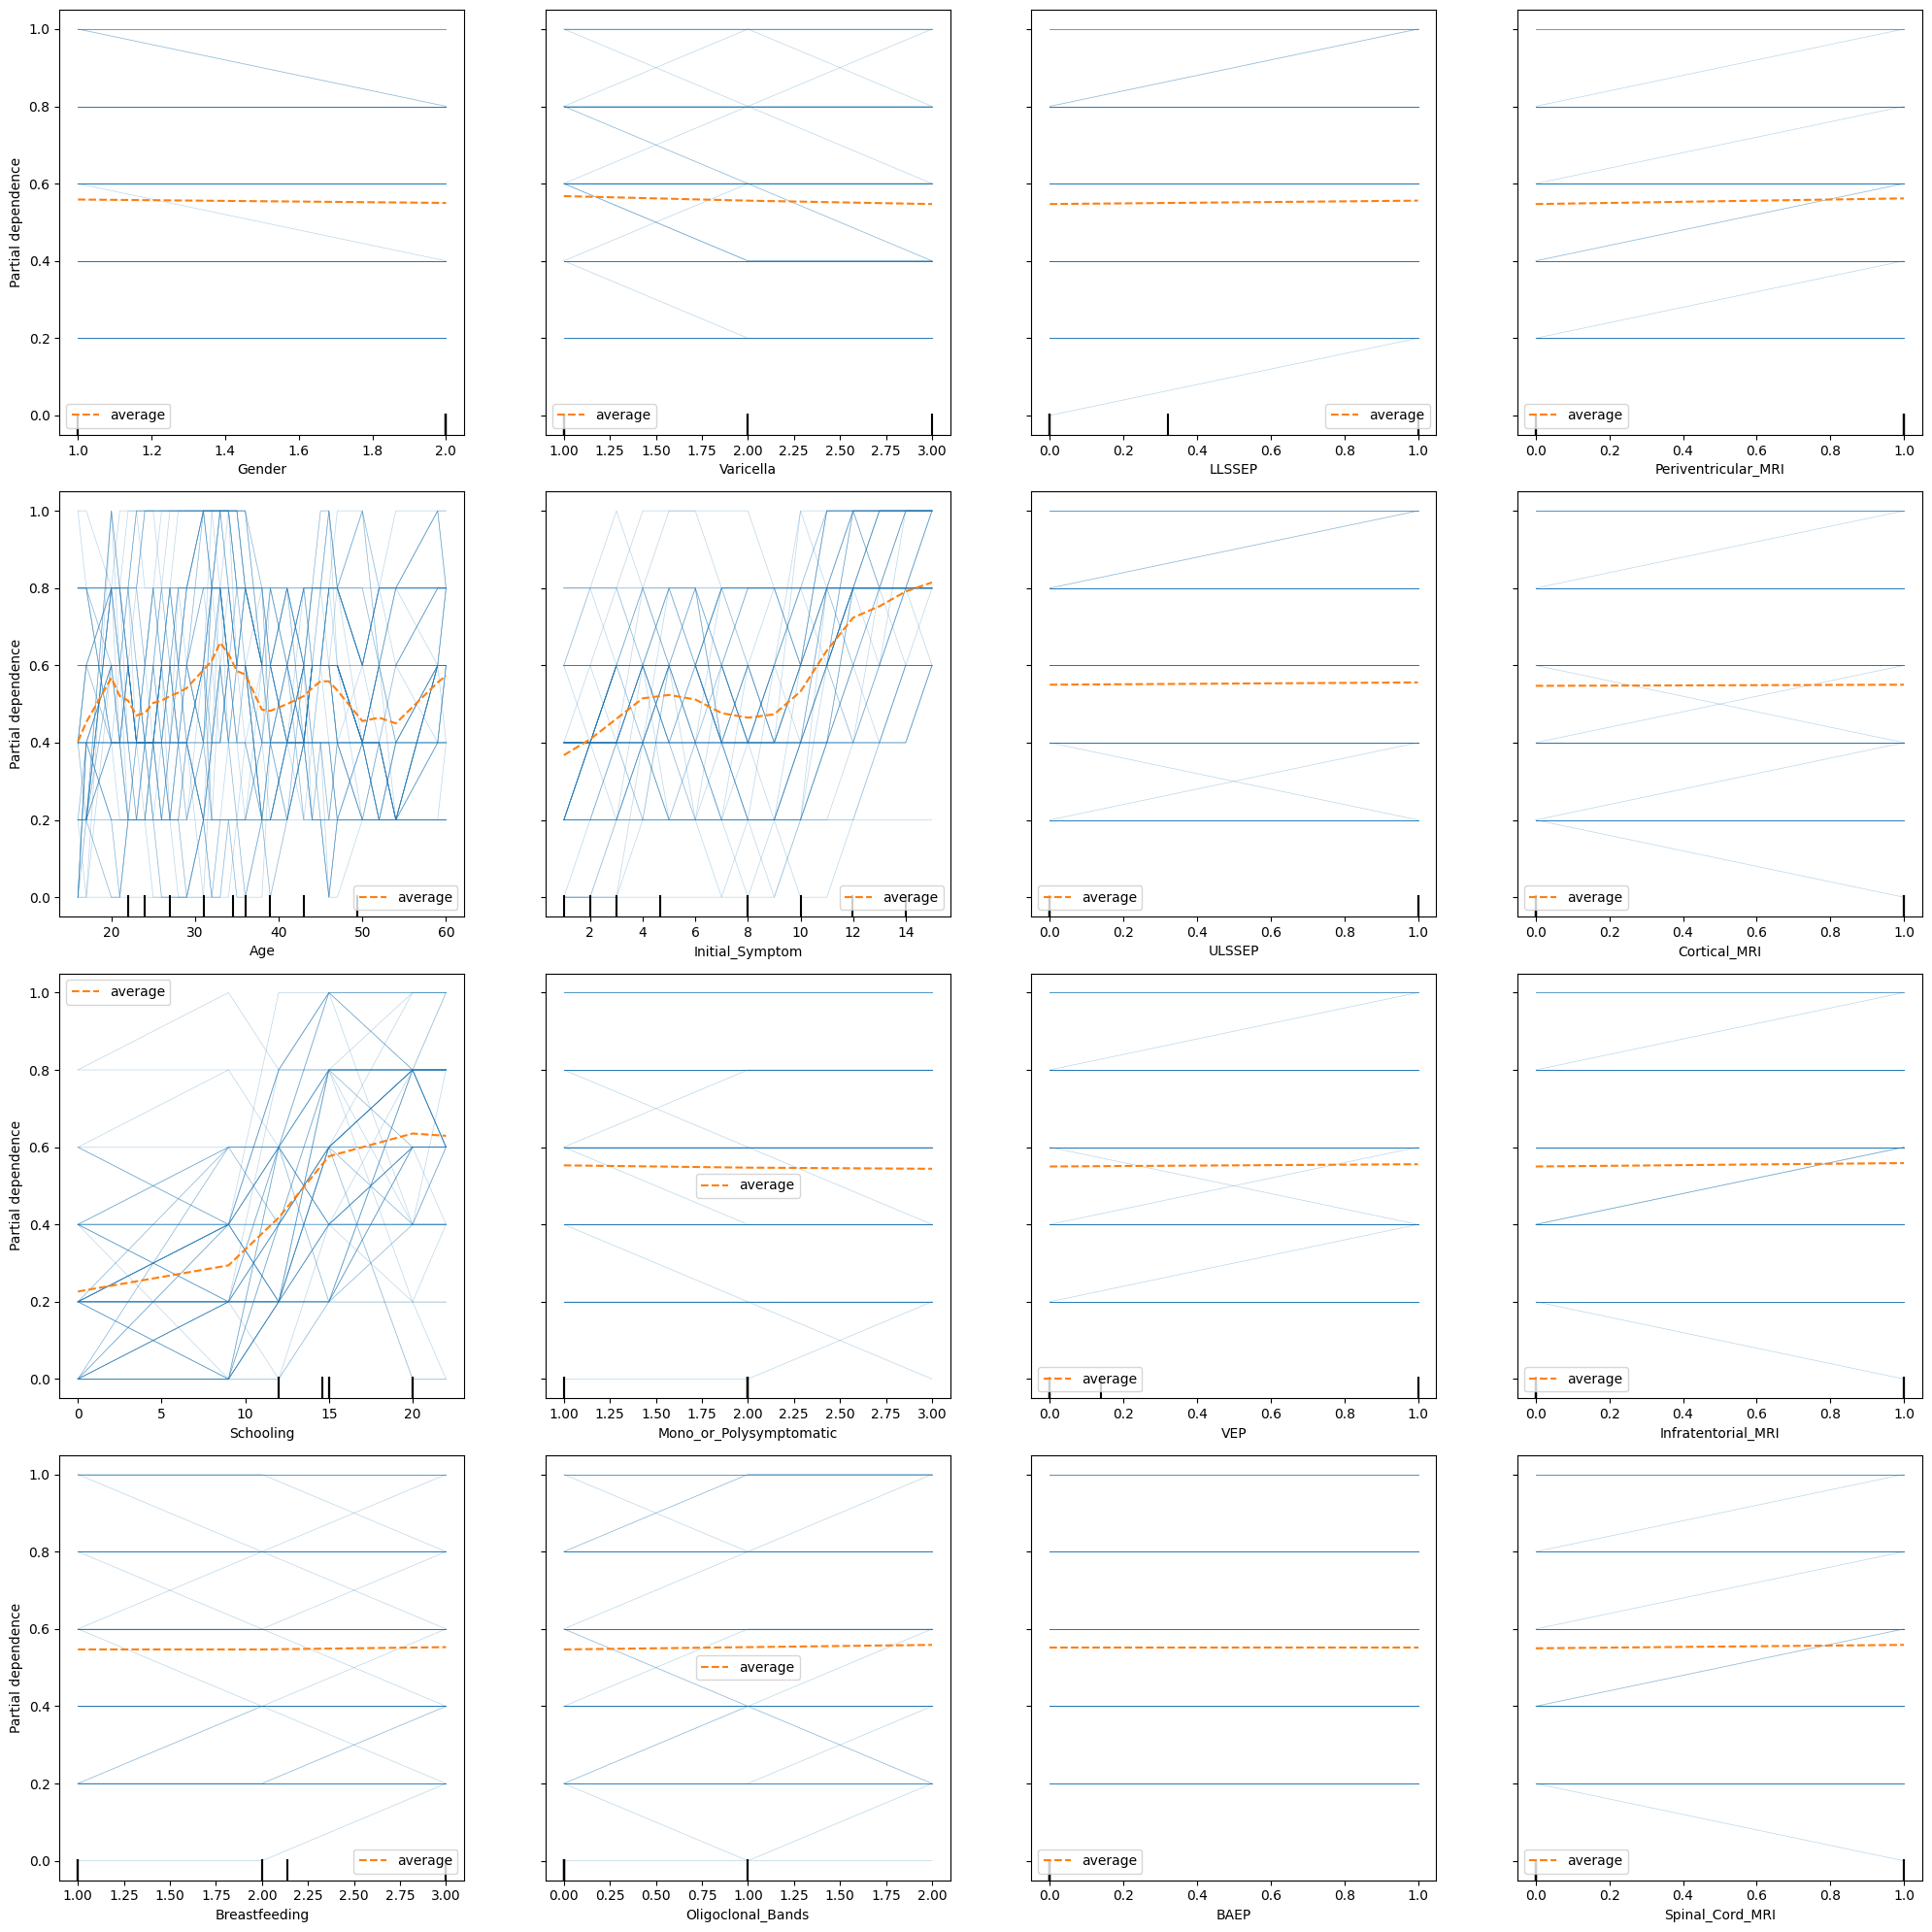

In [49]:
# Creating individual plots for each item in the loop with specified figure size, using 'ax' parameter for positioning
fig, axs = plt.subplots(4, 1, figsize=(20, 20))  # Adjust figure size and layout here

for idx, ax in enumerate(axs):
    disp2 = PartialDependenceDisplay.from_estimator(
        neigh, X_test, [idx, idx+4, idx+8, idx+12], kind='both', n_cols=4, ax=ax)
plt.tight_layout()


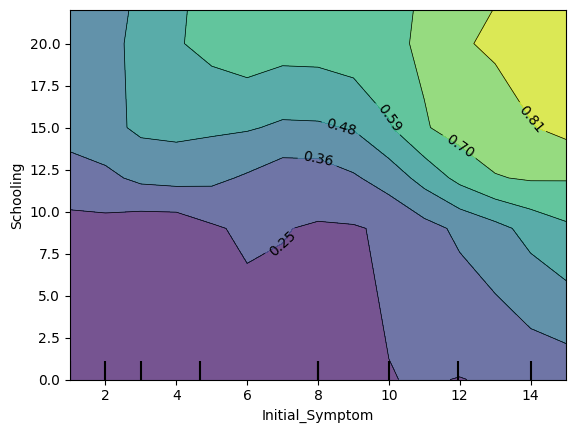

In [54]:
disp1 = PartialDependenceDisplay.from_estimator(neigh, X_test, [(5,2)])

Vale observar que a variável 'inital_symptom' é uma variável categorica que está de certa forma ordenada em função do nível de gravidade dos sintomas iniciais. Por isso é possível observar um aumento no valor médio do output do modelo com o aumento do valor dessa feature.